[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arturoTellez/tareas_AP/blob/master/RedesDensas/Respuestas.ipynb)

# Curso de aprendizaje profundo
PCIC, UNAM  
Tarea 1: Redes densas*

In [1]:
# !pip install plotly
# !pip install torch torchvision torchaudio
# !pip install tensorflow
# !pip install scipy


In [2]:
# Se importan los paquetes necesarios
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.express as px
from scipy import optimize
style.use("ggplot")
%matplotlib inline


import math
# sistema de archivos
import os
# números aleatorios
import random

# gráficas
import matplotlib.pyplot as plt
# arreglos multidimensionales
import numpy as np
# csv
import pandas as pd

# redes neuronales
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader, TensorDataset

### 1. Red de unidades de umbral lineal
Programa y evalúa una red de neuronas con funciones de activación escalón unitario que aproxime la operación XNOR (⊙) dada por  
|x1|x2|y |
|--|--|--|
|0 |0 |1 |
|0 |1 |0 |
|1 |0 |0 |
|1 |1 |1 |

In [3]:
def escalon(z):
    return int(z>=0)

In [6]:
X = np.array([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
y = np.array([1., 0., 0., 1.])

In [27]:
def multicapa(x, W1, b1, W2, b2):
  escv = np.vectorize(escalon)
  a = escv(np.dot(W1.T, x) + b1)
  return escv(np.dot(W2.T, a) + b2)

def buscar_pesos(var,  x, y):
    """
    Función para encontrar los parámetros
    """
    w11, w12, w13, w14, b11, b12, w21, w22, b2 = var
    W1 = np.array([[w11, w12], [w13, w14]])
    W2 = np.array([[w21], [w22]])
    b1 = np.array([b11, b12])
    b2 = np.array([b2])

    return  sum([multicapa(x[i,:], W1, b1, W2, b2)[0] != y[i] for i in range(len(y))])

buscar_pesos((20,30,10,40,50,80,20, 50,60 ), X, y,)

    

2

In [28]:
optimo = 4
while optimo != 0:
  res = optimize.minimize(
      buscar_pesos,
      method='Nelder-Mead',
      # bounds = ((-100,100), (-100,100),(-100,100),(-100,100),(-100,100), (-100,100),(-100,100), (-100,100), (-100,100)),
      tol = 0.00000001,
      x0=[np.random.random(9) * 20 - 10] ,
      args=(X, y),
      options = {"maxiter":1000000000}
  )
  if res.success:
    optimo = res.fun
print(res)

 final_simplex: (array([[-4.83257939, -8.09365794, -6.41133603, -2.32920261,  7.69162651,
         1.44917954, -8.89061259,  6.1928686 ,  6.99535829],
       [-4.8325794 , -8.09365794, -6.41133603, -2.32920261,  7.69162651,
         1.44917954, -8.89061259,  6.1928686 ,  6.99535829],
       [-4.83257939, -8.09365795, -6.41133603, -2.32920261,  7.69162651,
         1.44917954, -8.89061259,  6.1928686 ,  6.99535829],
       [-4.83257939, -8.09365794, -6.41133604, -2.32920261,  7.69162651,
         1.44917954, -8.89061259,  6.1928686 ,  6.99535829],
       [-4.83257939, -8.09365794, -6.41133603, -2.32920262,  7.69162651,
         1.44917954, -8.89061259,  6.1928686 ,  6.99535829],
       [-4.83257939, -8.09365794, -6.41133603, -2.32920261,  7.69162652,
         1.44917954, -8.89061259,  6.1928686 ,  6.99535829],
       [-4.83257939, -8.09365794, -6.41133603, -2.32920261,  7.69162651,
         1.44917954, -8.89061259,  6.1928686 ,  6.99535829],
       [-4.83257939, -8.09365794, -6.41133603

In [29]:
buscar_pesos(res.x,X,y)


0

In [30]:
w11, w12, w13, w14, b11, b12, w21, w22, b2 = res.x
X = X
y_xnor = y.copy()
W1 = np.array([[w11, w12], [w13, w14]])
W2 = np.array([[w21], [w22]])
b1 = np.array([b11, b12])
b2 = np.array([b2])



print('W_1 = [{0}{1}], b_1 = {2}'.format(W1[0, :], W1[1, :], b1))
print('W_2 = [{0}{1}], b_2 = {2}'.format(W2[0], W2[1], b2))
print('-----------------------------')
print('x_1 \tx_2 \ty\ty_hat')
print('-----------------------------')
for i in range(X.shape[0]):
  y_hat = multicapa(X[i], W1, b1, W2, b2)
  print('{0}\t{1}\t{2}\t{3}'.format(X[i, 0], X[i, 1], y_xnor[i], y_hat[0]))

W_1 = [[-4.83257939 -8.09365794][-6.41133603 -2.32920261]], b_1 = [7.69162651 1.44917954]
W_2 = [[-8.89061259][6.1928686]], b_2 = [6.99535829]
-----------------------------
x_1 	x_2 	y	y_hat
-----------------------------
0.0	0.0	1.0	1
0.0	1.0	0.0	0
1.0	0.0	0.0	0
1.0	1.0	1.0	1


### 3. Regresión lineal con PyTorch
Entrena y evalúa un modelo de regresión lineal para el conjunto de datos de calificaciones que considere los dos atributos de entrada.  
Especificaciones:  
• Grafica los datos en 3D.  
• Realiza la definición de la arquitectura usando tanto la interfaz de alto como la de medio nivel.  
• Prueba distintos valores para los hiperparámetros.  
• Realiza una predicción con tu modelo entrenado para la calificación que tendría un alumno si sabemos que estudió durante 12 horas para el examen y en un examen previo obtuvo 3 de calificación.  
• Discute las modificaciones que realizaste y las distintas configuraciones para los hiperpa-
rámetros que probaste.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   prev    50 non-null     float64
 1   horas   50 non-null     float64
 2   calif   50 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


None

prev     0
horas    0
calif    0
dtype: int64

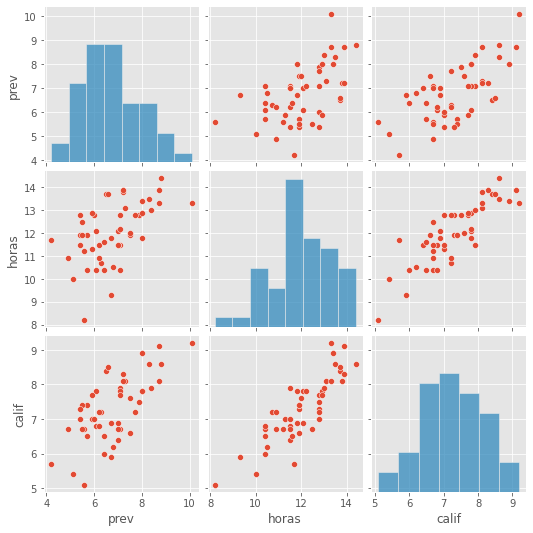

In [37]:
calif = pd.read_csv("https://raw.githubusercontent.com/gibranfp/CursoAprendizajeProfundo/2022-1/data/califs.csv")
display(calif.info())
print("=================================")
display(calif.isnull().sum())
sns.pairplot(calif);


In [43]:
fig = px.scatter_3d(calif, x='prev', y='horas', z='calif')
fig.show()